<a href="https://colab.research.google.com/github/mymooss/Tensorflow_practice/blob/main/4_with_simple_DNN%2C_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

**1. Fashion-MNIST 데이터 셋 불러오기**

In [ ]:
#Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

**2. 데이터 시각화 하기**

In [ ]:
#class name
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[0]

9

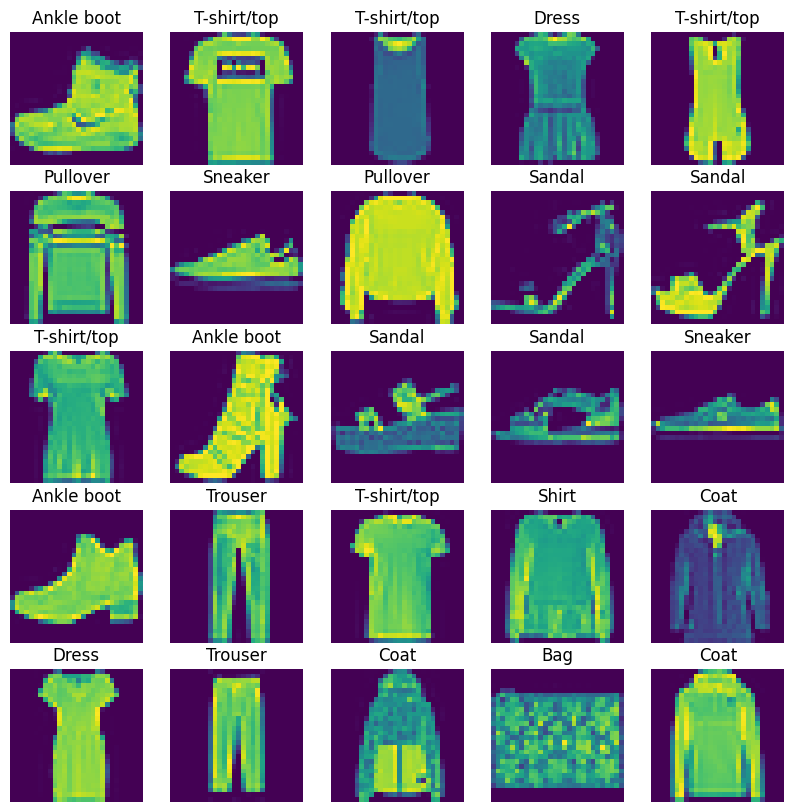

In [ ]:
#Create a figure and subplot grid
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.ravel()

#Loop through the first 25 images and plot them
for i in range(25):
    #Plot the image
    axs[i].imshow(x_train[i])
    axs[i].set_title(class_names[y_train[i]])
    axs[i].axis("off")

#Show the plot
plt.show()


**3.딥러닝 모델 정의**

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
#0~1 사이의 값으로 normalize합니다.
#이는 옵티마이저가 조금 더 빠르고 정확하게 최적해를 찾는데 도움이 됩니다.
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#data 형태 바꾸기.. 28*28 형태의 데이터를 .. 784 형태의 벡터로 바꿔줍니다.
print(x_train.shape, x_test.shape)
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)
(60000, 784) (10000, 784)


In [ ]:
len(x_train[0])

784

In [ ]:
#Sequential 모델 정의
model = keras.Sequential([
    keras.Input(shape=(784)), #mnist image는 28*28=784형태
    layers.Dense(256, activation ="relu"),
    layers.Dense(128, activation ="relu"),
    layers.Dense(10, activation ="softmax"),
])

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
#모델 컴파일
model.compile(
    optimizer="adam",
    loss= "sparse_categorical_crossentropy", #label이 one-hot 벡터가 아닌 일반 정수형일 때 내부적으로 one-hot vector로 바꿔서 계산해줌.
    metrics=["accuracy"]
)

In [ ]:
#모델 학습
history= model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
)

Epoch 1/5
938/938 [==============================] - 10s 9ms/step - loss: 0.4865 - accuracy: 0.8278
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.3602 - accuracy: 0.8688
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.3230 - accuracy: 0.8810
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2993 - accuracy: 0.8883
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2812 - accuracy: 0.8950


**4.모델평가**

In [ ]:
#모델 예측값 확인
predict = np.round(model.predict(x_test[0].reshape(-1,784)),3)
predict

1/1 [==============================] - 0s 157ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.02 , 0.   , 0.06 , 0.   ,
        0.919]], dtype=float32)

In [ ]:
#모델이 예측한 lable
predict_label = np.argmax(predict, axis=1)
class_names[predict_label[0]]

'Ankle boot'

'Ankle boot'

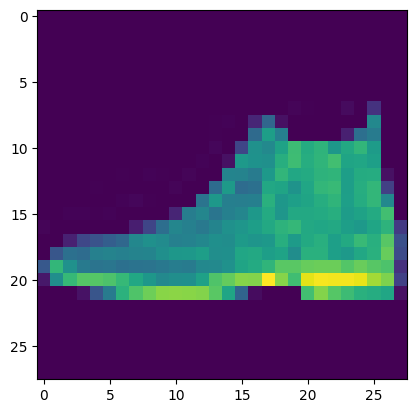

In [ ]:
#실제 데이터의 lable과 img
plt.imshow(x_test[0].reshape(28,28))
class_names[y_test[0]]

In [ ]:
#test set 으로 모델 평가
test_scores = model.evaluate(x_test.reshape(-1,784),y_test)
print("Test loss:", test_scores[0])
print("Test accuracy:",test_scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3425 - accuracy: 0.8762
Test loss: 0.3425201177597046
Test accuracy: 0.8762000203132629
